In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('../dataset.csv')

In [56]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [58]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## 1. Data Processing

**START_DATE** [ 2 points ]

In [59]:
df['START_DATE'].isna().any()

False

In [60]:
df['start time'] = df['START_DATE'].apply(lambda x : x.split(" ")[-1])
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors= "ignore" )

In [61]:
df.sample()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time
1043,12-12-2016 13:22,12-12-2016 13:32,Business,Cary,Cary,3.1,Errand/Supplies,13:22


**END_DATE** [ 2 points ]

In [62]:
df['END_DATE'].isna().any()

True

In [63]:
df['END_DATE'].isna().sum()

1

In [64]:
df[df['END_DATE'].isna()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN,Totals


In [65]:
df.drop(index=1155,inplace = True)

In [66]:
df['END_DATE'].isna().sum()

0

In [67]:
df['end time'] = df['END_DATE'].apply(lambda x : x.split(" ")[-1])

In [68]:
df.sample()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
121,2/18/2016 8:19,2/18/2016 8:27,Business,Unknown Location,Unknown Location,23.5,Temporary Site,8:19,8:27


In [69]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   object        
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
 7   start time  1155 non-null   object        
 8   end time    1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 81.3+ KB


**Category**

In [71]:
df['CATEGORY'].isna().sum()

0

In [72]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [73]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

**START**

In [74]:
df['START'].isna().sum()

0

In [75]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven

In [76]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [77]:
df[df['START']=='Unknown Location']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
109,2/16/2016 8:29,2016-02-16 09:34:00,Business,Unknown Location,Colombo,14.1,NaN,8:29,9:34
117,2/17/2016 13:18,2016-02-17 14:04:00,Business,Unknown Location,Colombo,14.7,Temporary Site,13:18,14:04
121,2/18/2016 8:19,2016-02-18 08:27:00,Business,Unknown Location,Unknown Location,23.5,Temporary Site,8:19,8:27
122,2/18/2016 14:03,2016-02-18 14:45:00,Business,Unknown Location,Islamabad,12.7,Temporary Site,14:03,14:45
124,2/18/2016 18:44,2016-02-18 18:58:00,Business,Unknown Location,Islamabad,5.2,Customer Visit,18:44,18:58
...,...,...,...,...,...,...,...,...,...
1129,12/28/2016 17:02,2016-12-28 17:16:00,Business,Unknown Location,Kar?chi,4.4,Errand/Supplies,17:02,17:16
1134,12/29/2016 11:28,2016-12-29 12:00:00,Business,Unknown Location,Kar?chi,11.9,Meal/Entertain,11:28,12:00
1141,12/29/2016 19:50,2016-12-29 20:10:00,Business,Unknown Location,Kar?chi,4.1,Customer Visit,19:50,20:10
1144,12/29/2016 23:14,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting,23:14,23:47


In [78]:
df = df[df['START']!='Unknown Location']

In [79]:
df.sample()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
982,11/20/2016 17:45,2016-11-20 18:37:00,Business,Cary,Cary,18.5,Errand/Supplies,17:45,18:37


**STOP**

In [80]:
df[df['STOP']=='Unknown Location']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
108,2/16/2016 3:21,2016-02-16 04:13:00,Business,Katunayaka,Unknown Location,43.7,Customer Visit,3:21,4:13
116,2/16/2016 17:40,2016-02-16 17:44:00,Business,Nugegoda,Unknown Location,3.6,Errand/Supplies,17:40,17:44
123,2/18/2016 15:16,2016-02-18 15:31:00,Business,Islamabad,Unknown Location,6.0,Temporary Site,15:16,15:31
125,2/18/2016 19:27,2016-02-18 20:08:00,Business,Islamabad,Unknown Location,10.0,Meeting,19:27,20:08
131,2/19/2016 12:09,2016-02-19 12:27:00,Business,Islamabad,Unknown Location,7.3,Temporary Site,12:09,12:27
...,...,...,...,...,...,...,...,...,...
1128,12/28/2016 15:04,2016-12-28 15:39:00,Business,Kar?chi,Unknown Location,8.5,Meal/Entertain,15:04,15:39
1133,12/29/2016 9:44,2016-12-29 10:07:00,Business,Kar?chi,Unknown Location,11.6,Meal/Entertain,9:44,10:07
1140,12/29/2016 18:59,2016-12-29 19:14:00,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain,18:59,19:14
1143,12/29/2016 20:53,2016-12-29 21:42:00,Business,Kar?chi,Unknown Location,6.4,NaN,20:53,21:42


In [81]:
df = df[df['STOP']!='Unknown Location']
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
0,01-01-2016 21:11,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,01-02-2016 01:25,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,01:25,01:37
2,01-02-2016 20:25,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,01-05-2016 17:31,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,01-06-2016 14:42,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
...,...,...,...,...,...,...,...,...,...
1148,12/30/2016 16:45,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,16:45,17:08
1149,12/30/2016 23:06,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10
1150,12/31/2016 1:07,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14
1153,12/31/2016 21:32,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50


In [82]:
df.shape

(944, 9)

In [83]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
0,01-01-2016 21:11,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,01-02-2016 01:25,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,01:25,01:37
2,01-02-2016 20:25,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,01-05-2016 17:31,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,01-06-2016 14:42,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
...,...,...,...,...,...,...,...,...,...
1148,12/30/2016 16:45,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,16:45,17:08
1149,12/30/2016 23:06,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10
1150,12/31/2016 1:07,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14
1153,12/31/2016 21:32,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50


**MILES**

In [84]:
df['MILES'].isna().sum()

0

**PURPOSE**

In [85]:
df['PURPOSE'].isna().sum()

372

In [86]:
df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [87]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')

In [88]:
df['PURPOSE'].value_counts()

Unknown            372
Meeting            164
Meal/Entertain     148
Errand/Supplies    111
Customer Visit      92
Temporary Site      32
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Airport/Travel       1
Name: PURPOSE, dtype: int64

In [89]:
df.sample()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
972,11/18/2016 21:56,2016-11-18 22:21:00,Business,Krendle Woods,Whitebridge,6.1,Meeting,21:56,22:21


## Data Exploration

<AxesSubplot: ylabel='CATEGORY'>

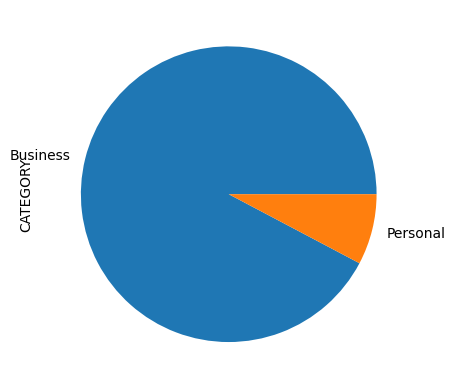

In [90]:
df['CATEGORY'].value_counts().plot.pie()

In [91]:
df['START'].value_counts().to_frame()

,START
Cary,200
Morrisville,85
Whitebridge,68
Durham,37
Islamabad,29
...,...
Coxville,1
Lakeview,1
Lower Garden District,1
Convention Center District,1


In [92]:
df['STOP'].value_counts().to_frame()

,STOP
Cary,203
Morrisville,83
Whitebridge,65
Durham,36
Islamabad,30
...,...
Daytona Beach,1
Sand Lake Commons,1
Sky Lake,1
Vista East,1


In [93]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start time,end time
0,01-01-2016 21:11,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17
1,01-02-2016 01:25,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,01:25,01:37
2,01-02-2016 20:25,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38
3,01-05-2016 17:31,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45
4,01-06-2016 14:42,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49
...,...,...,...,...,...,...,...,...,...
1148,12/30/2016 16:45,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,16:45,17:08
1149,12/30/2016 23:06,2016-12-30 23:10:00,Business,Kar?chi,Kar?chi,0.8,Customer Visit,23:06,23:10
1150,12/31/2016 1:07,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1:07,1:14
1153,12/31/2016 21:32,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21:32,21:50


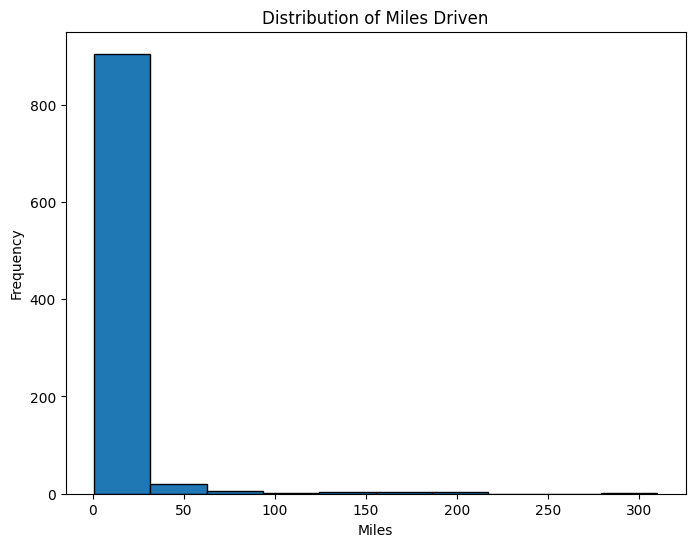

In [94]:
plt.figure(figsize=(8, 6))
plt.hist(df['MILES'], bins=10, edgecolor='black')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Miles Driven')
plt.show()

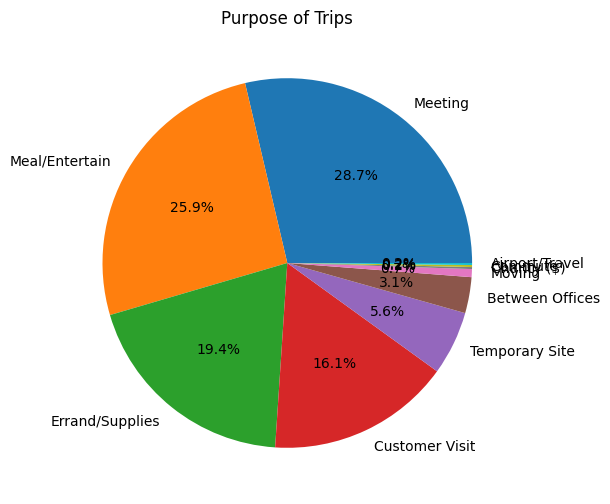

In [95]:
purpose_counts = df[df['PURPOSE']!='Unknown']['PURPOSE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Purpose of Trips')
plt.show()

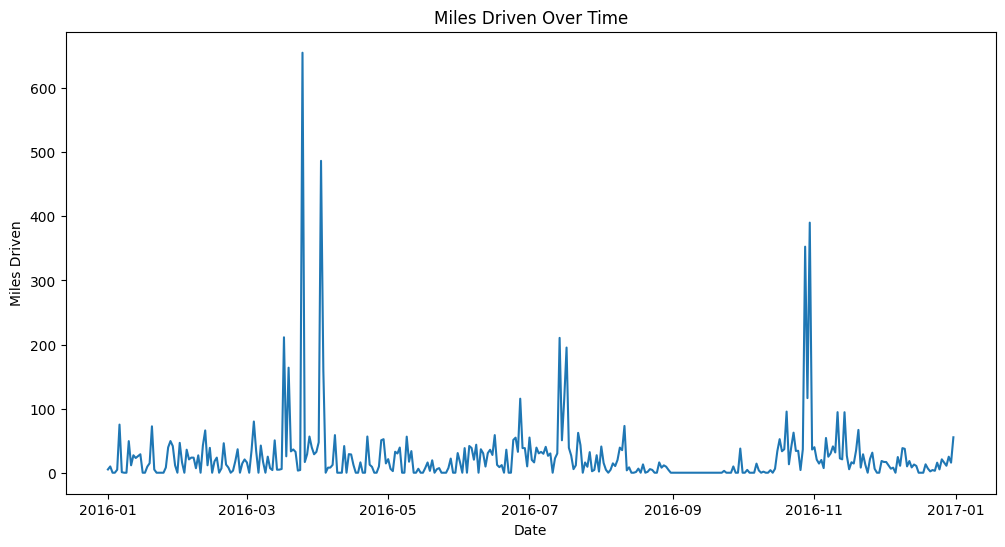

In [96]:
df = df[df['START_DATE'] != "Totals"]

df['START_DATE'] = pd.to_datetime(df['START_DATE'])

df.set_index('START_DATE', inplace=True)

daily_miles = df.resample('D')['MILES'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()


In [97]:
from sklearn.linear_model import LinearRegression

In [122]:
X_train

,START_Agnew,START_Almond,START_Apex,START_Arabi,START_Arlington,START_Arlington Park at Amberly,START_Asheville,START_Austin,START_Banner Elk,START_Bellevue,...,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_Temporary Site,PURPOSE_Unknown
START_DATE,,,,,,,,,,,,,,,,,,,,,
2016-03-26 16:26:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-02-07 20:22:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-05-01 17:33:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2016-05-22 15:39:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-06-29 11:49:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-14 16:35:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-04-03 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-12-02 20:41:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [98]:
features = ['START', 'CATEGORY', 'PURPOSE']

In [99]:
X = df[features]
X = pd.get_dummies(X) 
y = df['MILES']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [102]:
print(len(X_train),len(X_val),len(X_test))

755 94 95


In [123]:
X_train

,START_Agnew,START_Almond,START_Apex,START_Arabi,START_Arlington,START_Arlington Park at Amberly,START_Asheville,START_Austin,START_Banner Elk,START_Bellevue,...,PURPOSE_Between Offices,PURPOSE_Charity ($),PURPOSE_Commute,PURPOSE_Customer Visit,PURPOSE_Errand/Supplies,PURPOSE_Meal/Entertain,PURPOSE_Meeting,PURPOSE_Moving,PURPOSE_Temporary Site,PURPOSE_Unknown
START_DATE,,,,,,,,,,,,,,,,,,,,,
2016-03-26 16:26:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2016-02-07 20:22:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-05-01 17:33:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2016-05-22 15:39:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-06-29 11:49:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-14 16:35:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-04-03 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2016-12-02 20:41:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [124]:
model = LinearRegression(fit_intercept=True)

In [125]:
model.fit(X_train,y_train)

LinearRegression()

In [126]:
y_pred = model.predict(X_val)
len(y_pred)

94

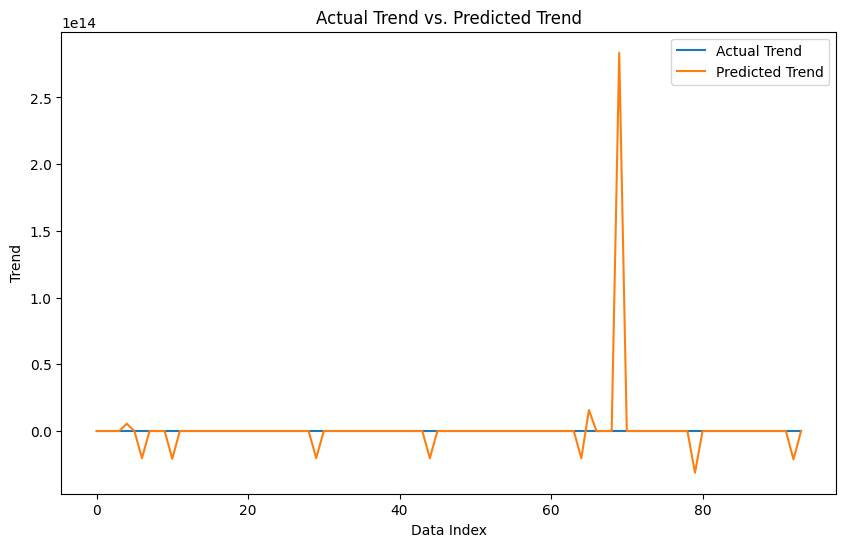

In [128]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_val)), y_val, label='Actual Trend')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [107]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 2.6619837257798516e+27
R-squared Score: -4.087381199893086e+24


In [108]:
model.intercept_

0.0

In [109]:
from sklearn.linear_model import Ridge

In [110]:
ridge_model = Ridge()

In [111]:
ridge_model.fit(X_train,y_train)

Ridge()

In [112]:
y_pred = ridge_model.predict(X_val)

In [113]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 657.8014876232421
R-squared Score: -0.010030755535618496


In [114]:
ridge_model.alpha

1.0

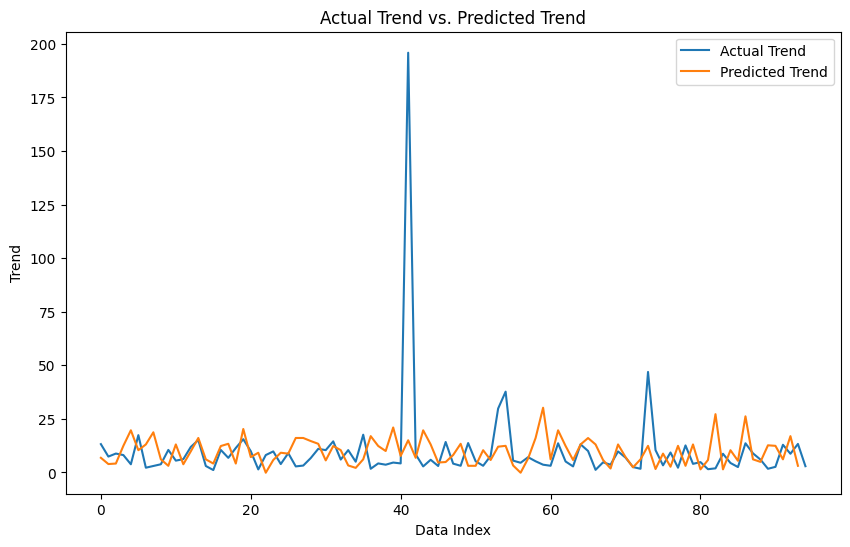

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Trend')
plt.xlabel('Data Index')
plt.ylabel('Trend')
plt.title('Actual Trend vs. Predicted Trend')
plt.legend()
plt.show()


In [151]:
from sklearn.linear_model import Lasso

In [152]:
lasso_model = Lasso()

In [153]:
lasso_model.fit(X_train,y_train)

Lasso()

In [154]:
y_pred = lasso_model.predict(X_val)

In [155]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 647.395188616323
R-squared Score: 0.0059477459516085185
